# Analisis Sentimen Ulasan Produk Amazon Berbasis Deep Learning

Analisis sentimen ulasan produk Amazon ini merupakan studi kasus yang dikerjakan dalam rangka Lomba FESMARO 2025, yang diselenggarakan oleh Himpunan Mahasiswa Departemen Teknik Elektro dan Informatika (HMDTEI), Universitas Negeri Malang. Proyek ini dikerjakan dalam rentang waktu 17-22 Maret 2025.

## Anggota Tim hpcUG_inBD

Tim hpcUG_inBD adalah kelompok mahasiswa Universitas Gunadarma, yang terdiri dari:
1. Muhammad Faqih Hakim (51422032)
2.  Danu Tirta (10123295)
3.  Nazwa Akilla Zahra (51422237)

## Informasi Dataset  

Dataset ini berisi lebih dari 34 juta ulasan produk Amazon yang diklasifikasikan ke dalam dua kategori sentimen: positif dan negatif. Ulasan dalam dataset mencakup berbagai produk selama 18 tahun dan dapat digunakan untuk analisis sentimen berbasis Machine Learning.

Setiap entri dalam dataset terdiri dari judul ulasan, isi ulasan, serta label sentimen berupa nilai polaritas, dengan ketentuan sebagai berikut:
- Nilai 1: Sentimen negatif (rating 1 dan 2)
- Nilai 2: Sentimen positif (rating 4 dan 5)

## Tahapan Analisis Sentimen

Analisis sentimen dilakukan berdasarkan tahapan dalam metode Cross-Industry Process for Data Mining (CRISP-DM), yang mencakup 6 langkah utama:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## Tahap 1: Business Understanding

Tahap Business Understanding dilakukan untuk memahami tujuan bisnis serta permasalahan yang ingin diselesaikan melalui analisis sentimen. Pada tahap ini, dilakukan identifikasi kebutuhan pengguna, manfaat yang diharapkan, serta cara pemanfaatan hasil analisis untuk mendukung pengambilan keputusan.

Dataset yang digunakan terdiri dari ulasan produk pada Amazon Reviews, yang diklasifikasikan ke dalam dua kategori sentimen:
- Negatif (Rating 1 dan 2)
- Positif (Rating 4 dan 5)

Tujuan dari proyek dalam lomba ini adalah membangun model Machine Learning yang mampu melakukan analisis sentimen secara akurat berdasarkan ulasan pengguna.

### Instalasi library yang dibutuhkan

In [ ]:
pip install gdown

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:  
Library gdown digunakan untuk mengunduh dataset dari Google Drive menggunakan link, terutama untuk file berukuran besar yang tidak dapat diunduh langsung dengan wget atau curl.

In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:  
Library pandas digunakan untuk memproses, menganalisis, dan memanipulasi data dalam bentuk tabel (DataFrame) secara efisien.

In [ ]:
pip install re

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:  
Library re digunakan untuk memproses dan mencocokkan pola teks menggunakan regular expressions (regex).

In [ ]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:  
Library nltk digunakan untuk memproses, menganalisis, dan memanipulasi teks dalam bidang Natural Language Processing (NLP), seperti tokenisasi, stemming, dan stopword removal.

In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:  
Library matplotlib digunakan untuk membuat visualisasi data dalam bentuk grafik, seperti diagram batang, garis, sebaran, dan histogram.

In [ ]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:    
Library sklearn (Scikit-Learn) digunakan untuk membangun dan mengimplementasikan model Machine Learning, termasuk preprocessing data, klasifikasi, regresi, clustering, dan evaluasi model.

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:    
Library TensorFlow digunakan untuk membangun, melatih, dan mengimplementasikan model Machine Learning dan Deep Learning, terutama dalam jaringan saraf tiruan (Neural Networks).

In [ ]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:  
Library wordcloud digunakan untuk membuat visualisasi kata dalam bentuk awan kata (word cloud), yang menampilkan frekuensi kata dalam teks secara menarik dan informatif.

In [ ]:
pip install collections

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:  
Library collections digunakan untuk menyediakan struktur data tambahan seperti counter, deque, defaultdict, yang lebih efisien dibandingkan tipe data bawaan Python untuk operasi tertentu.

In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:  
Library seaborn digunakan untuk membuat visualisasi data yang lebih informatif dan estetis, terutama untuk analisis statistik, dengan fitur bawaan seperti heatmap, boxplot, dan scatterplot.

In [ ]:
pip install pickle

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


#### Penjelasan singkat:  
Library pickle digunakan untuk menyimpan dan memuat kembali objek seperti tokenizer agar dapat digunakan kembali dalam prediksi.

### Memanggil library yang dibutuhkan

Memanggil library yang dibutuhkan untuk menganalisis sentimen.

In [ ]:
# Memanggil library python
import gdown
import pandas as pd
import re
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import pickle

# Download stopwords untuk pemrosesan teks
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/15000000/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tahap 2: Data Understanding

Tahap Data Understanding dilakukan untuk mengumpulkan, menelaah, dan memvalidasi data sebelum masuk ke tahap pemrosesan lebih lanjut.

### Mengumpulkan data
Dataset yang digunakan tersimpan di Google Drive dan perlu diunduh terlebih dahulu sebelum dianalisis.

In [ ]:
# Mengunduh dataset dari Google Drive
url = 'https://drive.google.com/uc?id=1uQsjTuRWrfupde9DUbjGv1N9hn5o1mPU'
output = 'Dataset.csv'
gdown.download(url, output, quiet=False)

# file akan disimpan dengan nama Dataset.csv 

Downloading...
From (original): https://drive.google.com/uc?id=1uQsjTuRWrfupde9DUbjGv1N9hn5o1mPU
From (redirected): https://drive.google.com/uc?id=1uQsjTuRWrfupde9DUbjGv1N9hn5o1mPU&confirm=t&uuid=7ec4bca9-92c2-4d3c-b2e1-0525ae7824c2
To: /home/15000000/Dataset.csv
100%|██████████| 1.59G/1.59G [00:39<00:00, 40.0MB/s]


'Dataset.csv'

Dataset yang diunduh akan tersimpan pada folder yang sama dengan lokasi penyimpanan file notebook (.ipynb).

### Memuat dan menelaah dataset

Memuat dan menelaah data diperlukan untuk memahami struktur, kualitas, dan karakteristik dataset sebelum pemrosesan lebih lanjut. Langkah ini dilakukan untuk:  
1. Memeriksa keberadaan header: Menambahkan nama kolom jika tidak tersedia.  
2. Menampilkan struktur dan tipe data: Memastikan format data sesuai untuk analisis.  
3. Menganalisis statistik deskriptif: Mengetahui distribusi nilai dan mendeteksi potensi anomali dalam dataset.

In [ ]:
# Memuat dataset awal
df = pd.read_csv("Dataset.csv")
df

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
3599994,1,Don't do it!!,The high chair looks great when it first comes...
3599995,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599996,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599997,1,what is it saying?,not sure what this book is supposed to be. It ...


Berdasarkan hasil pemuatan dataset, terlihat bahwa dataset tidak memiliki judul pada masing-masing kolomnya. Oleh karena itu, perlu dilakukan pemberian nama kolom secara manual.

In [ ]:
# Menambahkan header (nama kolom) secara manual
df = pd.read_csv("Dataset.csv", header=None)
df.columns = ['Rating', 'Judul', 'Ulasan']
df

,Rating,Judul,Ulasan
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...


In [ ]:
# Menampilkan informasi struktur dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
Rating    int64
Judul     object
Ulasan    object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


Dataset ini berisi 3,6 juta ulasan dengan 3 kolom utama:

- Rating (int64) berisi nilai polaritas sentimen pengguna dimana 1 bernilai negatif dan 2 bernilai positif.

- Judul (object) berisi judul dari ulasan, yang bisa memberikan gambaran singkat tentang isi ulasan.

- Ulasan (object) isi dari ulasan yang berisi opini pengguna terhadap produk atau layanan.

In [ ]:
# Menampilkan statistik deskriptif seluruh kolom
df.describe(include="all")

,Rating,Judul,Ulasan
count,3600000.0,3599923,3600000
unique,NaN,2628753,3594783
top,NaN,Disappointed,"I bought a QPS back in April, I had configurat..."
freq,NaN,9623,15
mean,1.5,NaN,NaN
std,0.5,NaN,NaN
min,1.0,NaN,NaN
25%,1.0,NaN,NaN
50%,1.5,NaN,NaN
75%,2.0,NaN,NaN


Berdasarkan statistik ini, kita bisa menarik beberapa informasi penting, antara lain:


- Mean 1.5 → menunjukkan bahwa jumlah ulasan negatif dan positif seimbang.
- Judul “Disappointed” muncul 9.623 kali, yang kemungkinan berasal dari ulasan negatif.

### Memvalidasi data

Validasi data diperlukan untuk memastikan kualitas dataset sebelum digunakan dalam pemodelan Machine Learning. Validasi dilakukan dengan:  

1. Memeriksa nilai kosong: Menghapus data yang tidak lengkap agar analisis tidak bias.  
2. Mendeteksi duplikasi: Menghindari pengaruh ganda dari data yang sama.  
3. Menganalisis distribusi kelas: Memastikan data seimbang untuk meningkatkan akurasi model.

#### Memeriksa nilai kosong

In [ ]:
# Deteksi nilai kosong pada data
df.isnull().sum()

Rating     0
Judul     77
Ulasan     0
dtype: int64

Dari hasil di atas, terlihat bahwa jumlah nilai NaN (missing values) dalam dataset adalah sebagai berikut:

- Rating: 0 (tidak ada nilai yang hilang)

- Judul: 77 (terdapat 77 data yang tidak memiliki judul)

- Ulasan: 0 (tidak ada nilai yang hilang)

#### Handling nilai kosong pada dataset

In [ ]:
# Hapus nilai kosong dan reset index
df = df.dropna().reset_index(drop=True)

Menghapus baris data yang memiliki nilai kosong didalamnya.

#### Memeriksa kembali nilai kosong

In [ ]:
# Periksa kembali nilai kosong setelah penghapusan
df.isnull().sum()

Rating    0
Judul     0
Ulasan    0
dtype: int64

Setelah dilakukan penghapusan data yang memiliki nilai kosong, dataset sudah tidak memiliki nilai kosong didalamnya.

#### Memeriksa data duplikat

In [ ]:
# Memeriksa data duplikat pada data
df.duplicated().sum()

0

Dataset tidak memiliki data yang terduplikasi.

#### Visualisasi distribusi kelas

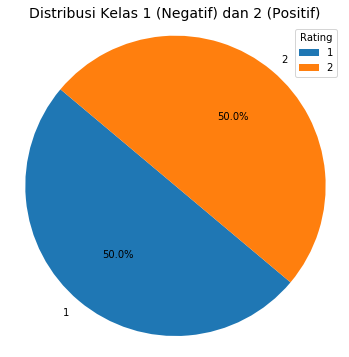

In [ ]:
# Visualisasi berikut digunakan untuk melihat proporsi distribusi rating dalam dataset
rating_counts = df['Rating'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Kelas 1 (Negatif) dan 2 (Positif)', fontsize=14)
plt.axis('equal')
plt.legend(title="Rating", loc="upper right")
plt.show()

- Visualisasi menunjukkan bahwa kelas negatif (1) dan positif (2) masing-masing memiliki 50% dari total data.

- Ini berarti dataset tidak mengalami class imbalance, sehingga model tidak akan condong ke salah satu kelas saat proses pelatihan.

## Tahap 3: Data Preparation

Dalam membangun model klasifikasi sentimen, langkah awal yang sangat penting adalah data preparation. Proses ini bertujuan untuk membersihkan dan menyiapkan teks agar dapat diproses oleh model Machine Learning secara optimal.

### Pembersihan teks

Data yang digunakan berasal dari ulasan pengguna, yang dapat berisi berbagai bentuk teks, termasuk simbol, angka, serta karakter khusus. Oleh karena itu, dilakukan beberapa tahap pembersihan teks:

1. Mengubah huruf menjadi kecil: Semua teks dikonversi ke huruf kecil agar tidak ada perbedaan makna antara kata yang sama dengan format huruf berbeda.
2. Menghapus karakter selain huruf: Simbol dan angka dihapus agar model hanya fokus pada kata-kata yang memiliki makna.
3. Menghapus spasi berlebih: Spasi ganda, di awal, tengah, maupun akhir kalimat dihilangkan untuk menjaga keterbacaan teks.
4. Tokenisasi: Teks dipecah menjadi daftar kata-kata individual untuk memudahkan analisis lebih lanjut.
5. Penghapusan stopwords: Kata-kata umum yang tidak memiliki makna signifikan dihapus agar model hanya mempertahankan kata-kata yang memiliki nilai informatif.
6. Penggabungan kembali teks yang telah dibersihkan: Setelah stopwords dihapus, token-token yang tersisa disatukan kembali menjadi teks yang bersih.

In [ ]:
# Cleaning dan normalisasi teks
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^A-Za-zÀ-ú ]+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Ulasan_Clean'] = df['Ulasan'].apply(preprocess_text)
df['Judul_Clean'] = df['Judul'].apply(preprocess_text)

### Explorasi label

Karakteristik dari masing-masing sentimen dapat dilakukan dengan analisis terhadap kata-kata yang paling sering muncul pada setiap kelas sentimen.

#### Kata yang paling sering muncul dalam ulasan negatif

Penggabungan semua teks dari ulasan negatif dan melakukan visualisasi kata-kata yang paling sering muncul dilakukan untuk mengetahui aspek yang sering dikeluhkan oleh pengguna.

In [ ]:
# Filter ulasan negatif dan tokenisasi ulasan negatif
df_negatif = df[df['Rating'] == 1].copy()
df_negatif['Tokens'] = df_negatif['Ulasan_Clean'].apply(lambda x: x.split())

Memisahkan ulasan dengan rating 1 (sentimen negatif) kedalam dataframe baru dan melakukan tokenisasi sederhana.

In [ ]:
# Hitung frekuensi kata dan menyimpan 20 kata yang paling banyak muncul
all_tokens_neg = [word for tokens in df_negatif['Tokens'] for word in tokens]
word_freq_neg = Counter(all_tokens_neg).most_common(20)
words_neg, freqs_neg = zip(*word_freq_neg)

Menggabungkan seluruh token dari ulasan negatif dan menghitung frekuensi kemudian menyimpan 20 kata yang paling sering muncul.

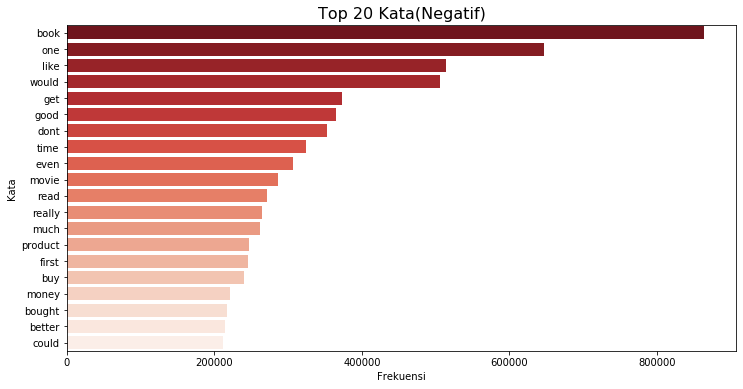

In [ ]:
# Visualisasi frekuensi kata negatif
plt.figure(figsize=(12,6))
sns.barplot(x=list(freqs_neg), y=list(words_neg), palette='Reds_r')
plt.title('Top 20 Kata(Negatif)', fontsize=16)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

Bar chart digunakan untuk memvisualisasikan 20 kata yang paling sering muncul dalam ulasan negatif.

#### Insight yang didapat dari visualisasi top 20 kata dalam ulasan negatif:
- Kata seperti "one", "like", "would", "get", dan "dont" sering muncul dalam ulasan negatif. Ini menunjukkan bahwa pengguna sering membandingkan pengalaman mereka dengan ekspektasi sebelumnya.
- Kata "dont", "time", "even", "movie" menunjukkan adanya ketidakpuasan terhadap waktu pengiriman, pengalaman menonton, atau kualitas produk yang tidak sesuai harapan.
- Kata "better", "could", dan "first" mengindikasikan bahwa pelanggan mungkin merasa ada pilihan yang lebih baik atau memiliki ekspektasi lebih tinggi terhadap produk tersebut.


Berdasarkan hal tersebut maka perusahaan dapat berfokus untuk meningkatkan kualitas produk, layanan pelanggan, dan memperbaiki aspek yang sering disebutkan dalam ulasan negatif untuk meningkatkan kepuasan pelanggan.

#### Visualisasi bigram yang paling sering muncul dalam ulasan negatif

Memvisualisasikan 20 pasangan kata (bigram) yang paling sering muncul dalam kelas negatif.

In [ ]:
# Buat bigram dan simpan 20 bigram terbanyak
bigrams_neg = list(ngrams(all_tokens_neg, 2))
bigram_freq_neg = Counter(bigrams_neg).most_common(20)
bigram_words_neg = [' '.join(bigram) for bigram, _ in bigram_freq_neg]
bigram_counts_neg = [count for _, count in bigram_freq_neg]

Membuat bigram dari token ulasan negatif kemudian menghitung frekuensi kemunculannya lalu menyimpan 20 bigram paling sering muncul.

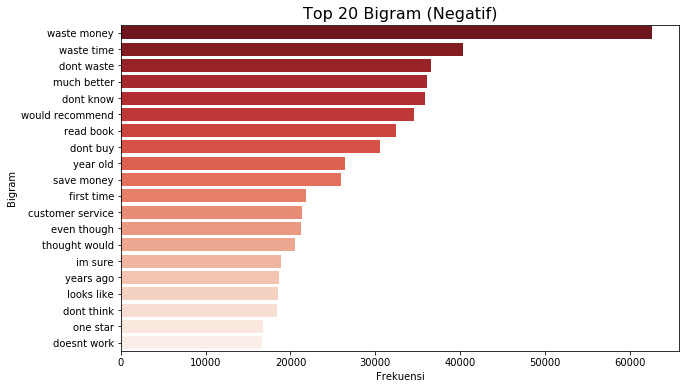

In [ ]:
# Visualisasi frekuensi bigram negatif
plt.figure(figsize=(10,6))
sns.barplot(x=bigram_counts_neg, y=bigram_words_neg, palette='Reds_r')
plt.title('Top 20 Bigram (Negatif)', fontsize=16)
plt.xlabel('Frekuensi')
plt.ylabel('Bigram')
plt.show()

Menampilkan visualisasi bar chart dari 20 bigram paling sering muncul pada
ulasan negatif.

#### Insight dari visualisasi top 20 bigram dalam ulasan negatif
- Frasa seperti "waste money" dan "waste time" menunjukkan bahwa banyak pengguna merasa produk atau layanan yang mereka gunakan tidak sebanding dengan uang atau waktu yang mereka keluarkan.
- Frasa "dont waste", "dont buy", dan "much better" mengindikasikan bahwa pelanggan menyesal telah membeli produk dan merasa ada alternatif produk lain yang lebih baik.
- Frasa seperti "doesnt work", "first time", dan "customer service" bisa menunjukkan adanya masalah dalam kualitas produk atau pengalaman pelanggan yang kurang memuaskan.
- Frasa seperti "save money" dan "dont think" mengindikasikan bahwa pengguna memberitahu pengguna lain untuk lebih berhati-hati dalam keputusan pembelian setelah pengalaman negatif yang dialaminya.


Dari visualisasi bigram negatif, banyak ulasan negatif terkait dengan pemborosan uang dan waktu, yang menunjukkan ketidakpuasan yang cukup tinggi terhadap produk. Beberapa bigram juga mengarah pada pengalaman buruk dengan layanan pelanggan atau produk yang tidak berfungsi dengan baik. Maka dari itu, brand atau perusahaan dapat lebih berfokus pada peningkatan kualitas produk dan layanan pelanggan untuk mengurangi sentimen negatif di masa mendatang.

#### Kata yang paling sering muncul dalam ulasan positif

Proses serupa dilakukan untuk ulasan positif guna memahami aspek yang sering dipuji oleh pengguna.

In [ ]:
# Filter ulasan positif dan tokenisasi ulasan positif
df_positif = df[df['Rating'] == 2].copy()
df_positif['Tokens'] = df_positif['Ulasan_Clean'].apply(lambda x: x.split())

Filter ulasan dengan rating 2 (positif) dan lakukan tokenisasi sederhana.

In [ ]:
# Hitung frekuensi kata dan simpan 20 kata paling sering muncul di kelas positif
all_tokens_pos = [word for tokens in df_positif['Tokens'] for word in tokens]
word_freq_pos = Counter(all_tokens_pos).most_common(20)
words_pos, freqs_pos = zip(*word_freq_pos)

Menggabungkan seluruh token dari ulasan positif dan menghitung frekuensi kata dan menyimpan 20 kata yang paling banyak muncul.

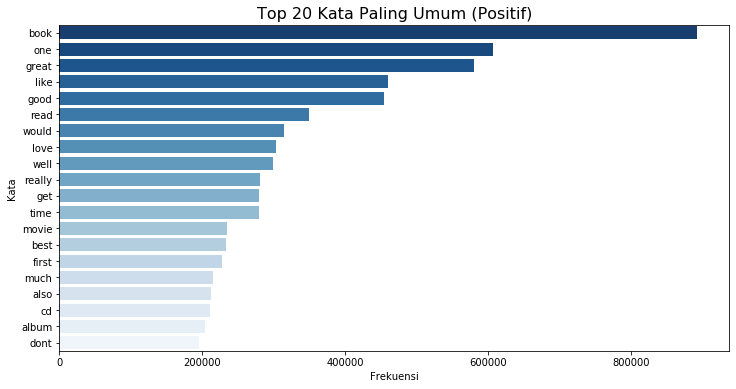

In [ ]:
# Visualisasi frekuensi kata positif
plt.figure(figsize=(12,6))
sns.barplot(x=list(freqs_pos), y=list(words_pos), palette='Blues_r')
plt.title('Top 20 Kata Paling Umum (Positif)', fontsize=16)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

Bar chart digunakan untuk memvisualisasikan 20 kata yang paling sering muncul dalam ulasan positif.

#### Insight dari visualisasi top 20 kata dalam ulasan positif
- Kata seperti "great", "good", "best", dan "love" menunjukkan bahwa banyak pengguna merasa puas dengan produk atau layanan yang mereka gunakan.
- Kata "like", "would", dan "really" bisa menunjukkan bahwa pengguna tidak hanya puas tetapi juga cenderung merekomendasikan produk kepada orang lain.
- Kata "book", "movie", "album", dan "cd" mengindikasikan bahwa produk yang sering dibahas dalam ulasan positif kemungkinan besar terkait dengan buku, film, dan musik. Kata "book" dan "movie" sering muncul dalam kedua kategori maka dari itu kedua kata ini juga termasuk dalam top 20 kata ulasan negatif
- Kata "read", "well", dan "get" bisa mencerminkan pengalaman positif pelanggan dalam memahami atau menerima produk yang mereka beli.
- Kata "first", "much", dan "also" menunjukkan bahwa pengguna mungkin membandingkan pengalaman pertama mereka dengan ekspektasi atau pengalaman sebelumnya yang baik.

Banyak ulasan positif terkait produk dalam kategori buku, film, dan musik. Brand atau perusahaan dapat lebih mempertahankan kualitas dan aspek yang paling diapresiasi oleh pelanggan untuk lebih meningkatkan loyalitas pengguna terhadap produk.

#### Visualisasi bigram yang paling sering muncul (positif)


Menampilkan 20 bigram yang paling sering muncul dalam ulasan positif, untuk memahami frasa yang umum digunakan oleh pengguna saat memberikan ulasan positif.

In [ ]:
# Buat bigram dan simpan 20 bigram terbanyak
bigrams_pos = list(ngrams(all_tokens_pos, 2))
bigram_freq_pos = Counter(bigrams_pos).most_common(15)
bigram_words_pos = [' '.join(bigram) for bigram, _ in bigram_freq_pos]
bigram_counts_pos = [count for _, count in bigram_freq_pos]

Visualisasi bar chart bigram paling sering muncul pada kelas positif.

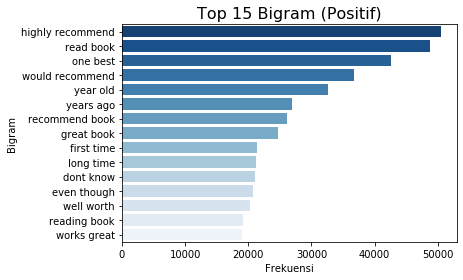

In [ ]:
# Visualisasi frekuensi bigram pada ulasan positif
sns.barplot(x=bigram_counts_pos, y=bigram_words_pos, palette='Blues_r')
plt.title('Top 15 Bigram (Positif)', fontsize=16)
plt.xlabel('Frekuensi')
plt.ylabel('Bigram')
plt.show()

#### Kesimpulan
Berdasarkan visualisasi top 15 bigram positif, pengguna cenderung merekomendasikan produk atau layanan yang mereka gunakan.

- Frasa seperti "highly recommend", "would recommend", dan "recommend book" menunjukkan bahwa pengguna merasa puas dan ingin menyarankan produk kepada orang lain.

- Kata "great book", "reading book", dan "works great" juga mengindikasikan kepuasan terhadap buku atau materi bacaan yang mereka konsumsi.

- Beberapa frasa seperti "first time" dan "long time" bisa menunjukkan pengalaman pertama atau jangka panjang yang memuaskan.

Berbeda dengan bigram negatif, di mana pengguna lebih banyak mengeluhkan kerugian waktu dan uang, bigram positif lebih banyak menunjukkan kepuasan dan rekomendasi, produk yang berkaitan dengan buku tampaknya mendominasi ulasan positif, sebagaimana terlihat dalam bigram seperti "read book", "recommend book", dan "great book".

### Menggabungkan feature teks dan memetakan label sentimen

Setelah teks ulasan dan judul dibersihkan, keduanya digabungkan menjadi satu fitur teks utama yang digunakan sebagai variabel input bagi model. Label sentimen yang awalnya berbentuk rating numerik dipetakan ke dalam format biner agar sesuai untuk klasifikasi biner.

In [ ]:
# Menyiapkan fitur dan target
df['Text'] = df['Judul_Clean'] + ' ' + df['Ulasan_Clean']
X = df['Text']
df['Rating'] = df['Rating'].map({1: 0, 2: 1})
y = df['Rating'].values

Dengan ini, data telah siap untuk digunakan dalam model klasifikasi sentimen berbasis deep learning.

### Tokenisasi teks menggunakan Tokenizer dari Keras

Agar dapat diproses oleh model berbasis deep learning, teks perlu dikonversi menjadi representasi numerik menggunakan Tokenizer dari Keras dengan parameter:
- Menampung hingga 20.000 kata yang paling sering muncul dalam dataset.
- Menggunakan token khusus untuk kata-kata yang tidak dikenal (Out of Vocabulary).

In [ ]:
# Tokenisasi data
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

Setelah proses tokenisasi, teks dikonversi menjadi sekuens angka berdasarkan indeks kata dalam kamus tokenizer.

### Konversi teks ke urutan angka dan padding

Karena panjang teks ulasan bervariasi, dilakukan proses padding untuk menyamakan panjang semua sekuens agar dapat diproses oleh model. Sehingga variabel X dikonversi menjadi urutan angka (sequence) berdasarkan indeks kata dalam kamus tokenizer.

In [ ]:
# Konversi teks ke urutan angka
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

In [ ]:
# Lihat hasil konversi
padded_sequences

array([[   1,   16,    1, ...,    0,    0,    0],
       [  21,  878,   51, ...,    0,    0,    0],
       [ 241,  878,  192, ...,    0,    0,    0],
       ...,
       [1976,   94,  460, ...,    0,    0,    0],
       [ 688,  131,    2, ...,    0,    0,    0],
       [ 108, 1316,  437, ...,    0,    0,    0]], dtype=int32)

### Pembagian dataset dengan perbandingan 80:20

Setelah proses data preprocessing selesai, langkah selanjutnya adalah membagi dataset menjadi dua bagian yaitu training set dan testing set. Pembagian ini bertujuan untuk memastikan bahwa model dapat belajar dari sebagian besar data dan kemudian diuji dengan data yang belum pernah dilihat sebelumnya untuk mengevaluasi performanya.

In [ ]:
# Split dataset dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42, stratify=y)

Dataset dibagi dimana sebanyak 20% data digunakan untuk test dan sisanya 80% untuk train model, dan parameter stratify=y digunakan untuk memastikan bahwa proporsi kelas (positif dan negatif) tetap seimbang di kedua subset, sehingga hasil pelatihan lebih akurat dan adil. Dengan ini, data telah siap digunakan untuk model klasifikasi sentimen berbasis deep learning.

## Tahap 4: Modeling

Tahap modeling bertujuan untuk membangun model prediktif menggunakan data yang telah dipersiapkan guna menghasilkan model yang sesuai dengan tujuan analisis.

###  Arsitektur model

Model yang dibuat bertujuan untuk mengklasifikasikan teks ulasan pengguna ke dalam dua kategori sentimen: positif dan negatif. Model ini menggunakan pendekatan Long Short-Term Memory (LSTM) dengan arsitektur bidirectional (dua arah) agar dapat menangkap konteks dari teks secara lebih baik.

### Rincian arsitektur model:

- Embedding layer: Mengubah setiap kata menjadi representasi vektor, dengan maksimal 20.000 kata yang digunakan.
- Bidirectional LSTM (64 units, return_sequences=True): Memproses urutan teks dari dua arah (maju dan mundur) untuk menangkap konteks yang lebih kaya dari ulasan pengguna.
- Dropout (0.5) dan BatchNormalization: Digunakan untuk mencegah overfitting.
- Bidirectional LSTM (32 units): Layer LSTM kedua ini berfungsi untuk menyaring informasi penting dari hasil LSTM sebelumnya.
- Dropout (0.4) dan BatchNormalization: Dropout digunakan untuk mengurangi risiko overfitting dengan mengabaikan sebagian neuron secara acak pada saat pelatihan, sedangkan BatchNormalization membantu menstabilkan dan mempercepat proses pelatihan model.
- Dense layer (64 units, ReLU): Layer ini merupakan lapisan penghubung yang menerima hasil dari layer LSTM dan memprosesnya lebih lanjut untuk menyaring fitur-fitur penting sebelum prediksi akhir
- Dropout (0.3): Tambahan pengaman terakhir untuk mencegah overfitting
- Output layer (Dense, 1 unit, Sigmoid): Lapisan terakhir ini menghasilkan angka antara 0 hingga 1 sebagai hasil dari prediksi, angka tersebut digunakan untuk menentukan apakah ulasan bersentimen negatif (0) atau positif (1). Dan fungsi aktivasi sigmoid digunakan untuk klasifikasi dua kelas.

In [ ]:
# Membangun model klasifikasi
model = Sequential([
    Embedding(input_dim=20000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    BatchNormalization(),
    Bidirectional(LSTM(32)),
    Dropout(0.4),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

### Kompilasi model

Model dikompilasi menggunakan fungsi loss binary crossentropy, optimizer Adam, dan metrik evaluasi akurasi, yang sesuai untuk tugas klasifikasi biner.

In [ ]:
# Mengkompilasi model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Ringkasan struktur model

Menampilkan detail struktur model, termasuk jumlah layer, bentuk output setiap layer, serta total parameter yang dapat dilatih.

In [ ]:
# Lihat struktur model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, None, 128)         512       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                2

Model ini terdiri dari 10 lapisan, dengan total 2,7 juta parameter, yang dirancang untuk tugas klasifikasi sentimen menggunakan kombinasi dari Embedding Layer, Bidirectional LSTM, dan Dense Layer

### Mendefinisikan callback checkpoint

Penyimpanan model dengan val_loss terkecil ke file 'best_model.h5' selama proses pelatihan.

In [ ]:
# Callback checkpoint
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

### Melatih model

Model dilatih menggunakan data latih selama 3 epoch dengan batch size 1024, serta menggunakan data validasi untuk mengevaluasi performa model. Callback digunakan untuk menyimpan model terbaik berdasarkan nilai val_loss terkecil.

In [ ]:
# Melatih model
history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=1024,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint]
)

Epoch 1/3
2813/2813 [==============================] - 4973s 2s/step - loss: 0.2325 - accuracy: 0.9064 - val_loss: 0.1980 - val_accuracy: 0.9215

Epoch 00001: val_loss improved from inf to 0.19797, saving model to best_model.h5
Epoch 2/3
2813/2813 [==============================] - 4740s 2s/step - loss: 0.1891 - accuracy: 0.9262 - val_loss: 0.1915 - val_accuracy: 0.9261

Epoch 00002: val_loss improved from 0.19797 to 0.19148, saving model to best_model.h5
Epoch 3/3
2813/2813 [==============================] - 4752s 2s/step - loss: 0.1690 - accuracy: 0.9351 - val_loss: 0.1813 - val_accuracy: 0.9293

Epoch 00003: val_loss improved from 0.19148 to 0.18128, saving model to best_model.h5


## Tahap 5: Evaluation

Setelah proses pelatihan model selesai, langkah selanjutnya adalah menilai kinerja model untuk memastikan bahwa hasil yang diperoleh memenuhi kebutuhan analisis.

### Visualisasi akurasi model

Visualisasi ini digunakan untuk melihat perubahan nilai akurasi pelatihan (training accuracy) dan akurasi validasi (validation accuracy) pada setiap epoch.

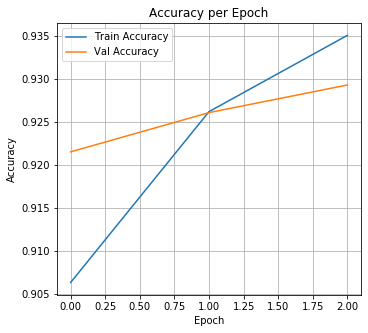

In [ ]:
# Visualisasi akurasi model per-epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

- Akurasi pelatihan mencapai 93,46% dan akurasi validasi 92,88%, menandakan model mampu mengenali pola sentimen dengan baik.
- Perbedaan antara train accuracy dan val accuracy relatif kecil, yang mengindikasikan model tidak mengalami overfitting dan dapat bekerja dengan baik pada data baru.
- Akurasi validasi yang tetap tinggi menunjukkan bahwa model dapat diterapkan pada data lain dengan performa yang cukup baik.

### Visualisasi loss model

Visualisasi ini menunjukkan perubahan nilai loss pada data pelatihan dan validasi untuk setiap epoch.

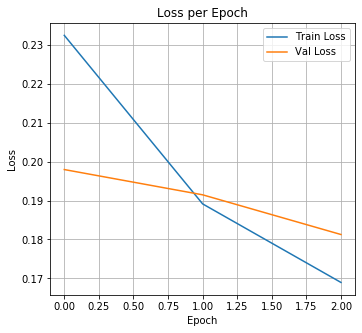

In [ ]:
# Visualisasi loss model per-epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



*   Nilai train loss dan validation loss menurun pada setiap epoch, menandakan model semakin baik dalam belajar dari data latihannya.
*   Penurunan loss menunjukkan bahwa model dapat memahami pola dalam data dan mengurangi kesalahan dalam prediksi.
*   Validation loss juga mengalami penurunan, yang menandakan model tidak hanya menghafal data latihannya, tetapi juga bekerja dengan baik pada data validasi





### Potensi penerapan solusi di lembaga mitra
Analisis sentimen ulasan produk Amazon memiliki beberapa potensi penerapan solusi di lembaga mitra, khususnya dalam bidang e-commerce, pemasaran digital, dan analisis data. Berikut adalah beberapa lembaga yang dapat memanfaatkan hasil dari proyek ini:

1. Platform E-Commerce
- Deteksi otomatis ulasan negatif untuk merespons keluhan pelanggan dengan cepat.  
- Meningkatkan rekomendasi produk berdasarkan sentimen pelanggan.  
- Menganalisis tren opini pelanggan untuk meningkatkan pengalaman pengguna untuk berbelanja.  

2. Pemasaran Digital
- Membandingkan sentimen produk sendiri vs kompetitor.  
- Mengoptimalkan kampanye marketing dengan memahami opini pelanggan.  
- Mengidentifikasi kata kunci populer dalam ulasan untuk strategi SEO atau kampanye marketing yang tepat.  

Analisis sentimen ulasan produk Amazon memiliki potensi penerapan yang luas di berbagai sektor, terutama dalam bidang e-commerce, dan pemasaran digital.

Dengan solusi ini, lembaga mitra dapat:  
- Meningkatkan efisiensi analisis opini pelanggan.  
- Memperbaiki layanan dan produk berdasarkan feedback.  
- Mengoptimalkan strategi pemasaran untuk hasil yang lebih baik.  

Solusi ini dapat membuka peluang besar bagi perusahaan untuk lebih memahami pelanggan dan meningkatkan daya saing di pasar.

## Tahap 6: Deployment
Tahap deployment adalah tahap akhir di mana model yang telah dikembangkan dan dievaluasi diimplementasikan dalam lingkungan produksi agar dapat digunakan oleh pengguna akhir.

Sebelum membangun dashboard, terdapat beberapa hal yang perlu dipersiapkan:
 1. Dataset: Dataset ulasan produk Amazon dalam format csv.
 2. Environtment: Menggunakan Python 3.12 Streamlit untuk membuat dashboard.
 3. Library yang digunakan, antara lain:
- Pandas
- Numpy
- TensorFlow
- Matplotlib
- Streamlit

### Menjalankan dashboard online
berikut link akses dashboard:
> https://amazon-reviews-fesmaro.streamlit.app/

### Menjalankan dashboard secara lokal

Jika ingin menjalankan di komputer sendiri (misalnya untuk pengembangan atau modifikasi), ikuti langkah berikut:  

1. Install Python dan library yang dibutuhkan, pastikan Python 3.12 sudah terinstall. Kemudian, install library yang diperlukan:  
```
pip install pandas numpy tensorflow matplotlib streamlit
```
2. Clone repository dari GitHub
Unduh atau clone repository dari GitHub dan masuk ke directory yang diunduh:
```
git clone https://github.com/Fqih/Analisis-Big-Data-Fesmaro.git
cd Analisis-Big-Data-Fesmaro
```
3. Masuk ke directory dashboard
```
cd Dashboard
```
3. Jalankan dashboard
```
Streamlit run main.py
```

### Acknowledgement

Seluruh tahapan analisis sentimen ini dilakukan menggunakan mesin Hyper Computation milik Universitas Gunadarma. Akses terhadap mesin ini dilakukan pada 17-22 Maret 2025.